In [1]:
%matplotlib inline

import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Add local functions to the path
sys.path.append(os.path.join(os.pardir, 'src'))
from data import load_data

In [2]:
filepath = load_data.ORG

In [3]:
load_data.PROJECT_DIR

'C:\\Users\\HP\\Soc\\AMZN_Stock_Prediction'

In [4]:
data = load_data.loadData(filepath)

In [5]:
data.shape

(3019, 6)

In [6]:
data.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [7]:
print(data.index.min())
print(data.index.max())

2006-01-03 00:00:00
2017-12-29 00:00:00


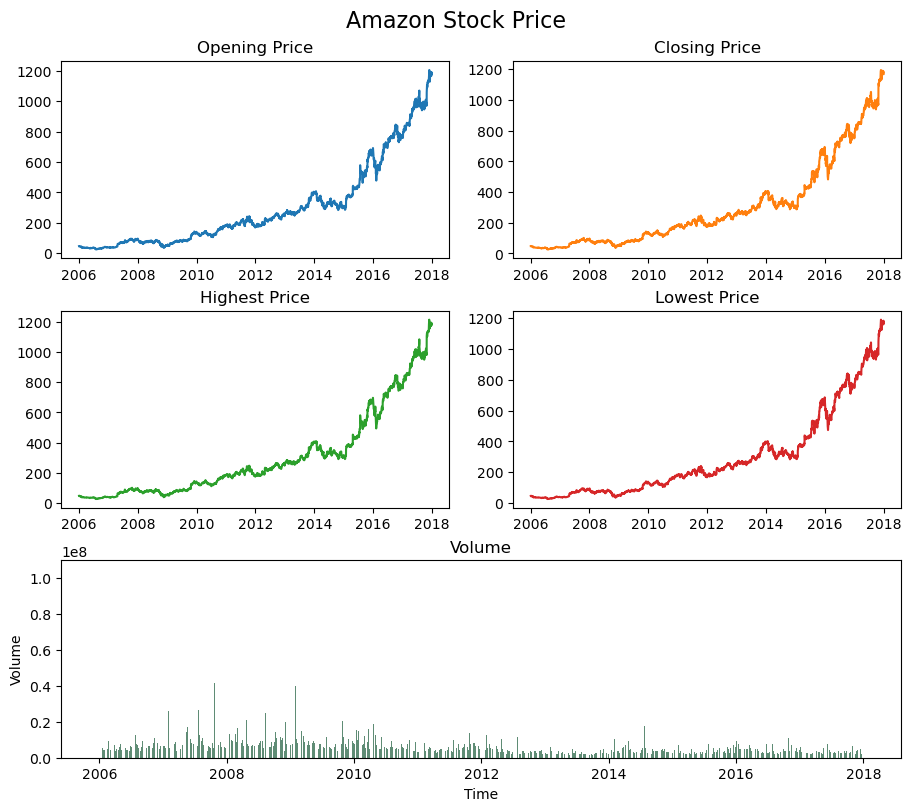

In [8]:
fig = plt.figure(figsize=(9, 8), constrained_layout=True)
spec = fig.add_gridspec(3, 2)

ax0 = fig.add_subplot(spec[0, 0])
ax0.plot(data['Open'])
ax0.set_title('Opening Price')

ax0 = fig.add_subplot(spec[0, 1])
ax0.plot(data['Close'], 'tab:orange')
ax0.set_title('Closing Price')

ax10 = fig.add_subplot(spec[1, 0])
ax10.plot(data['High'], 'tab:green')
ax10.set_title('Highest Price')

ax11 = fig.add_subplot(spec[1, 1])
ax11.plot(data['Low'], 'tab:red')
ax11.set_title('Lowest Price')

ax2 = fig.add_subplot(spec[2, :])
ax2.bar(data.index, data['Volume'], color = (0.3, 0.5, 0.4, 0.9))
ax2.set_title('Volume')
ax2.set_xlabel('Time')
ax2.set_ylabel('Volume')

fig.suptitle('Amazon Stock Price', fontsize=16)

plt.show()

In [9]:
def decompose(df, column_name):

    result_mul = seasonal_decompose(df[column_name], model='multiplicative', period = 650)
    result_add = seasonal_decompose(df[column_name], model = 'additive', period = 650)

    plt.rcParams.update({'figure.figsize': (9, 8)})
    result_mul.plot()
    result_add.plot()
    plt.show()

    return result_mul, result_add

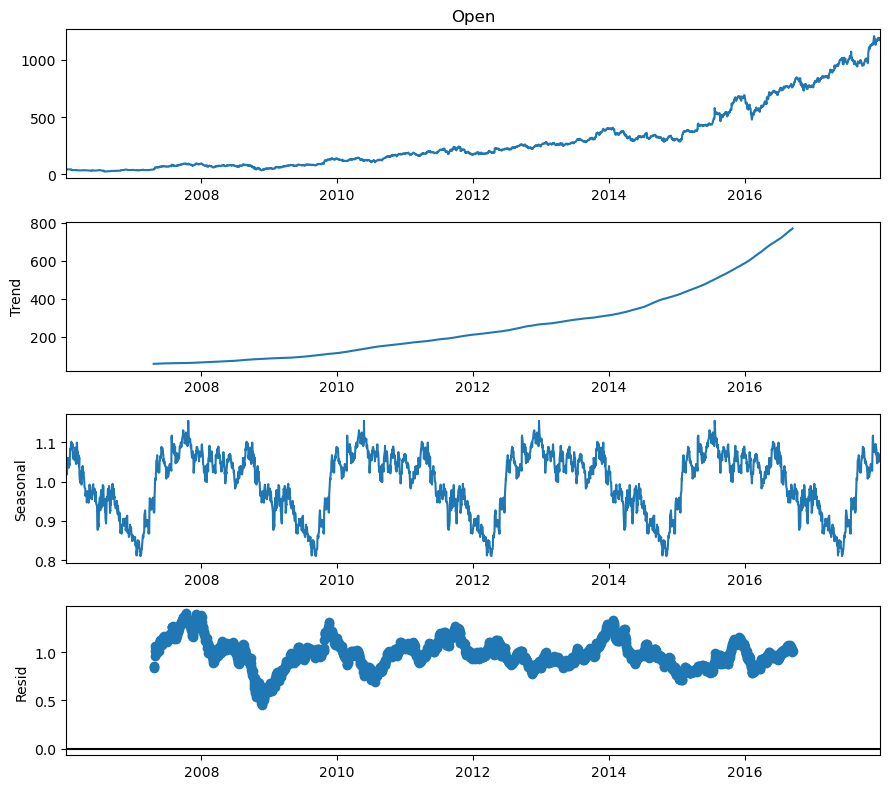

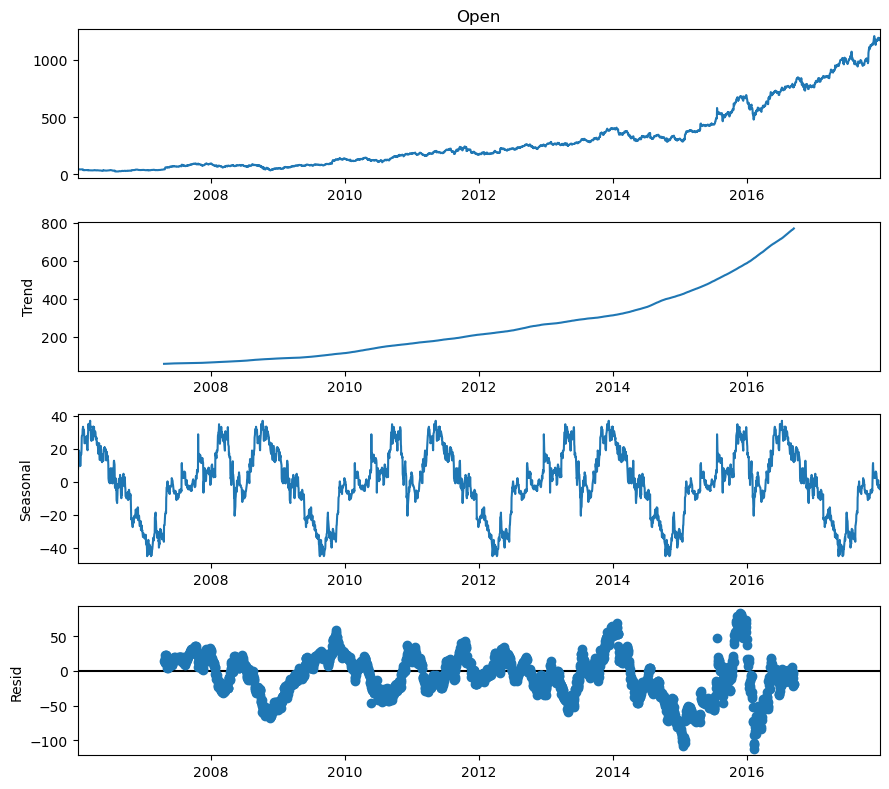

In [10]:
result_mul, result_add = decompose(data, 'Open')

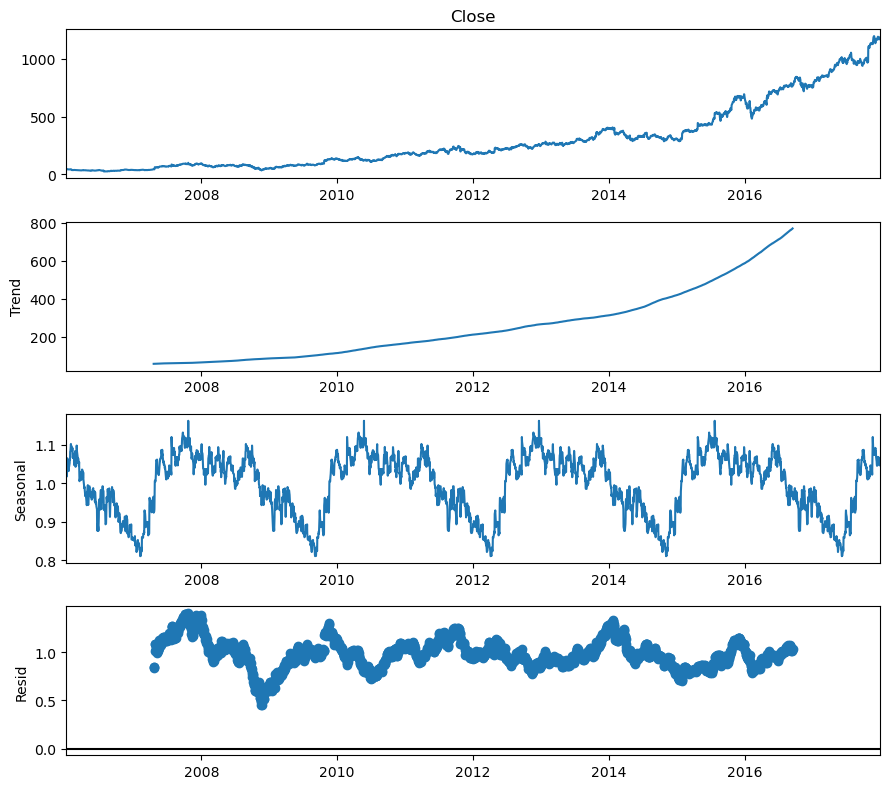

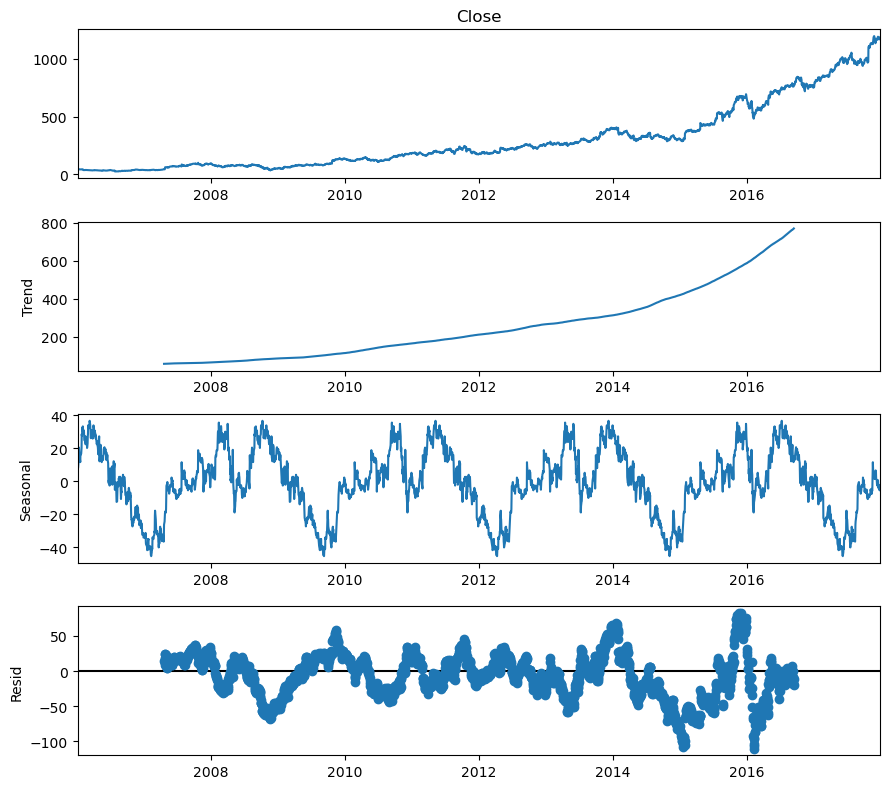

In [11]:
result_mul, result_add = decompose(data, 'Close')

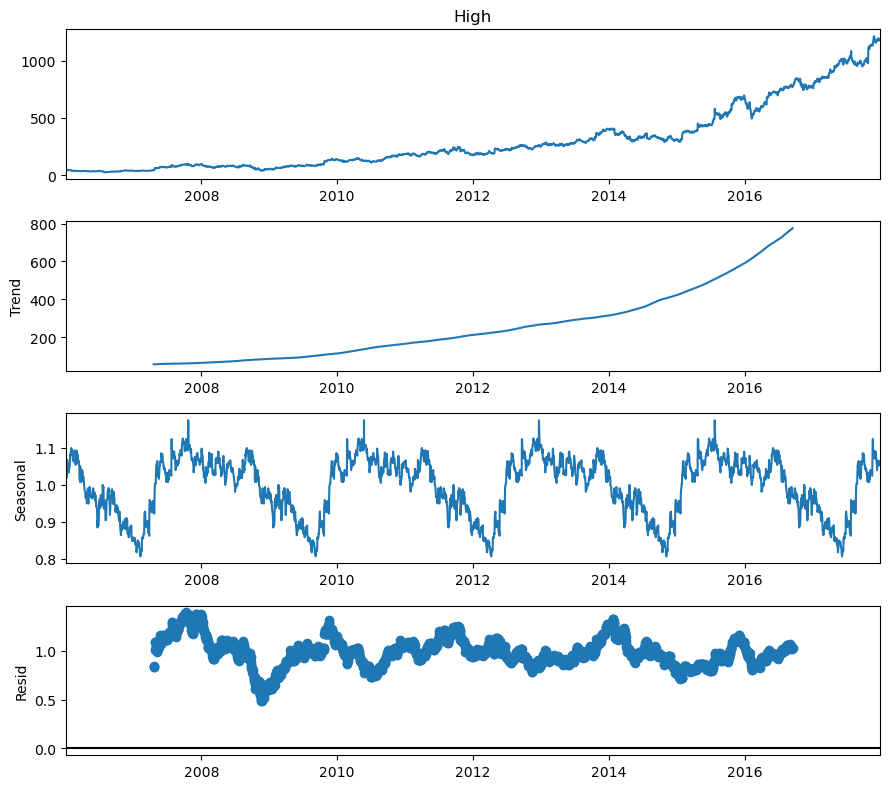

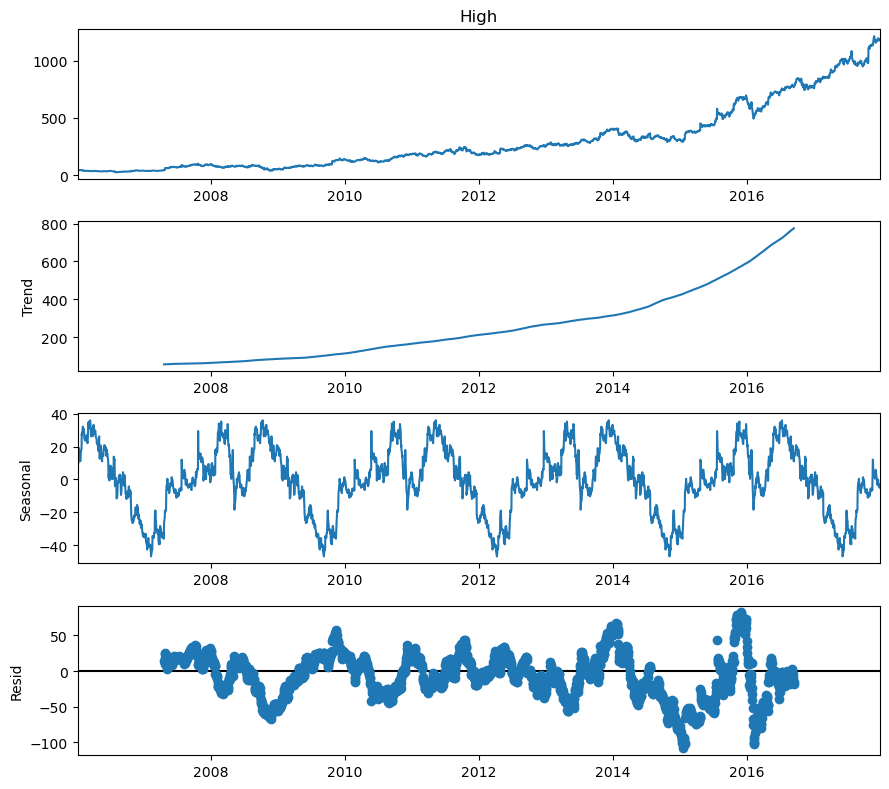

In [12]:
result_mul, result_add = decompose(data, 'High')

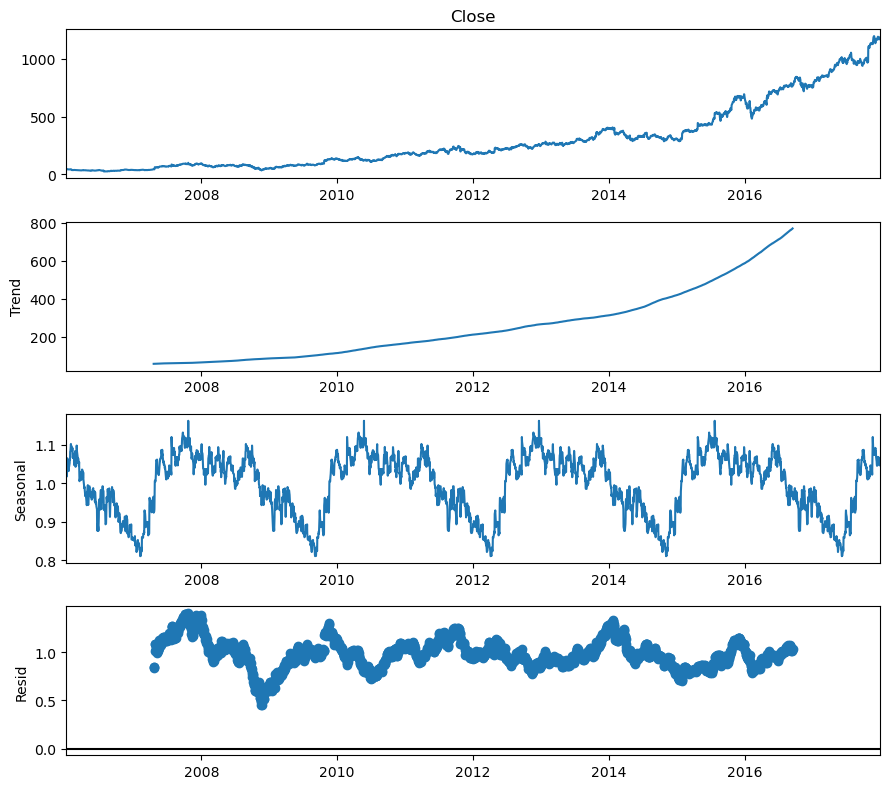

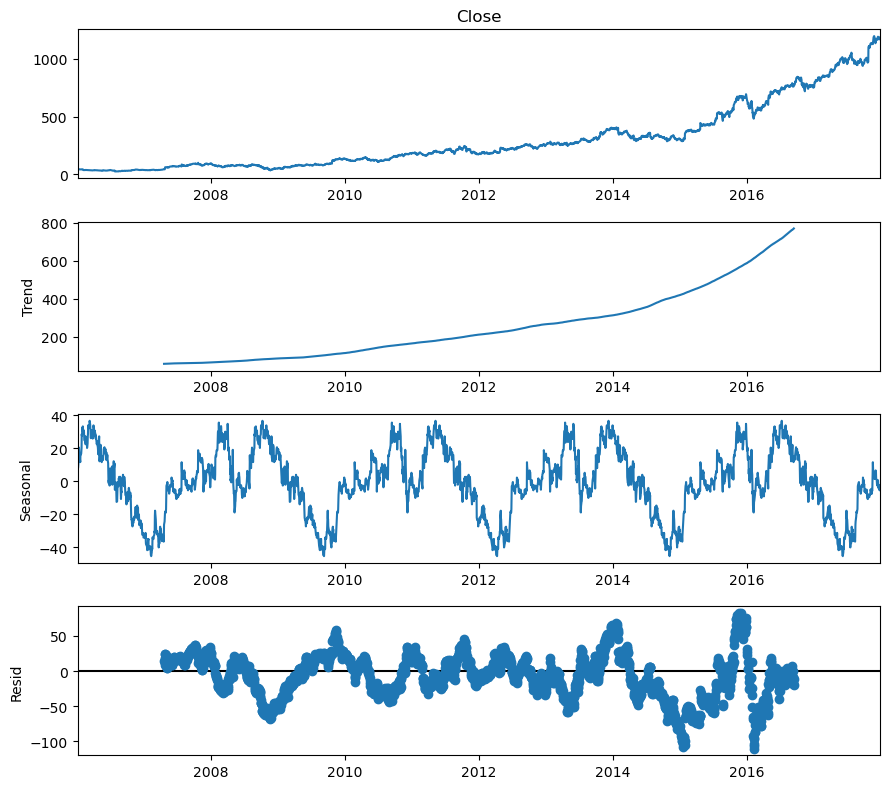

In [13]:
result_mul, result_add = decompose(data, 'Close')

In [14]:
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Quarter'] = data.index.quarter
data

,Open,High,Low,Close,Volume,Name,Year,Month,Quarter
Date,,,,,,,,,
2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN,2006,1,1
2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN,2006,1,1
2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN,2006,1,1
2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN,2006,1,1
2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN,2006,1,1
...,...,...,...,...,...,...,...,...,...
2017-12-22,1172.08,1174.62,1167.83,1168.36,1585054,AMZN,2017,12,4
2017-12-26,1168.36,1178.32,1160.55,1176.76,2005187,AMZN,2017,12,4
2017-12-27,1179.91,1187.29,1175.61,1182.26,1867208,AMZN,2017,12,4


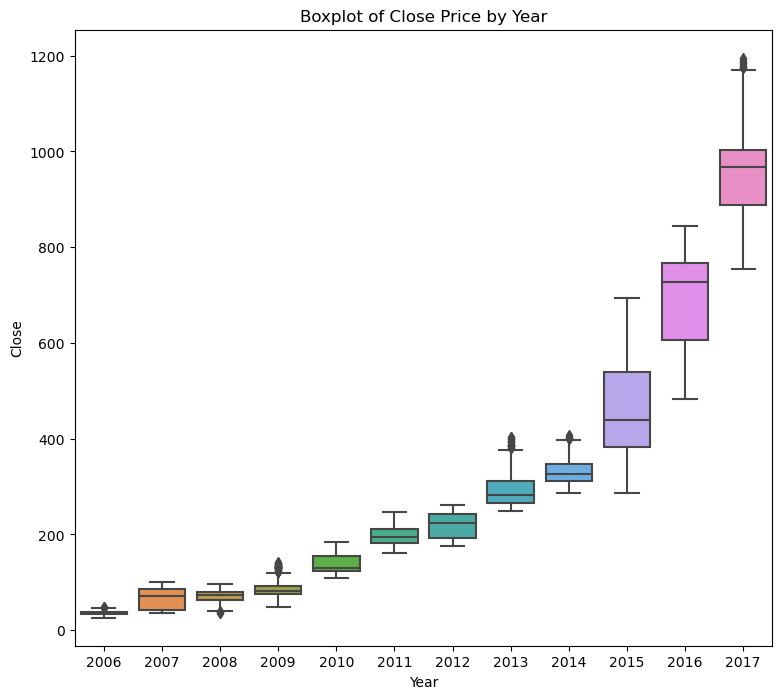

In [15]:
plt.figure(figsize=(9, 8))
sns.boxplot(x='Year', y='Close', data=data)
plt.title('Boxplot of Close Price by Year')
plt.show()

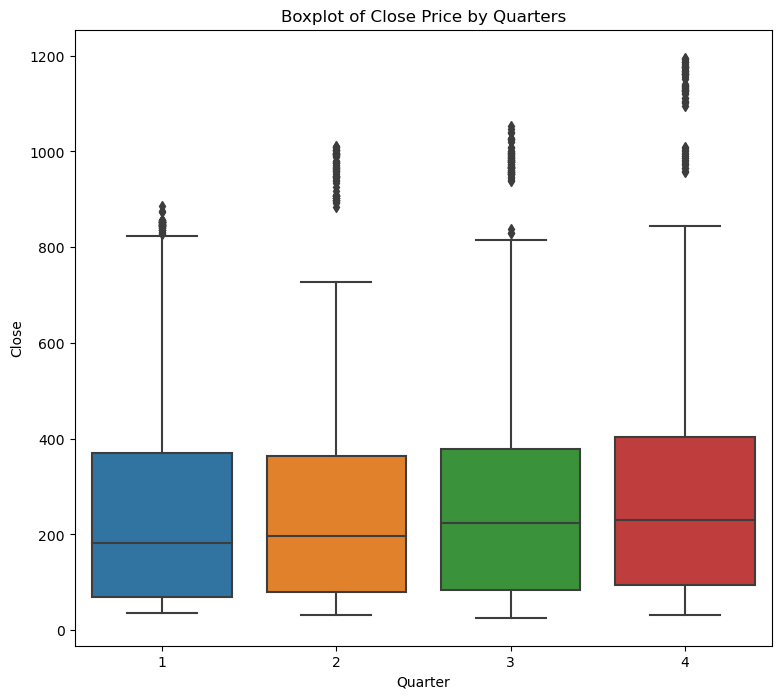

In [16]:
plt.figure(figsize=(9, 8))
sns.boxplot(x='Quarter', y='Close', data=data)
plt.title('Boxplot of Close Price by Quarters')
plt.show()

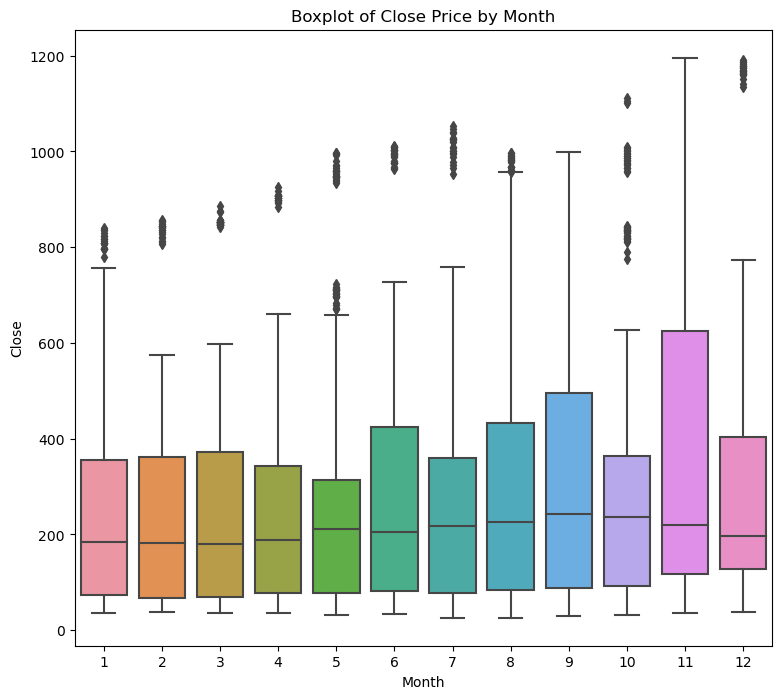

In [17]:
plt.figure(figsize=(9, 8))
sns.boxplot(x='Month', y='Close', data=data)
plt.title('Boxplot of Close Price by Month')
plt.show()